In [1]:
#Import needed packages
import requests
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import iqr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# The following suppresses the use of scientific notation and keeps the precision to a desired number
np.set_printoptions(precision=3, suppress = True)

In [3]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Import housing price dataset
url = ("https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv")
data = pd.read_csv(url)

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
data['price'] = data['price'].round(decimals=0)

In [8]:
data.shape

(21613, 21)

In [9]:
#Check for null values in entire dataset

print(data.isnull().values.any())

False


In [10]:
#Check for duplicate entries

data[data.duplicated(keep='first')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No duplicates!

In [11]:
print(f"AVG House Price: ${round(data['price'].mean(),2)}")
print(f"MED House Price: ${round(data['price'].median(),2)}")

print(f"MIN House Price: ${data['price'].min()}")
print(f"MAX House Price: ${data['price'].max()}")

AVG House Price: $540088.14
MED House Price: $450000.0
MIN House Price: $75000
MAX House Price: $7700000


In [12]:
print(f"MAX Bedrooms: {data['bedrooms'].max()}")
print(f"MIN Bedrooms: {data['bedrooms'].min()}")

MAX Bedrooms: 33
MIN Bedrooms: 0


In [13]:
print(f"MAX Views: {data['view'].max()}")
print(f"MIN Views: {data['view'].min()}")

MAX Views: 4
MIN Views: 0


In [14]:
print(f"MAX Date: {data['date'].max()}")
print(f"MIN Date: {data['date'].min()}")

MAX Date: 20150527T000000
MIN Date: 20140502T000000


In [15]:
print(f"MAX Year Built: {data['yr_built'].max()}")
print(f"MIN Year Built: {data['yr_built'].min()}")

MAX Year Built: 2015
MIN Year Built: 1900


In [16]:
#How many distinct* zip codes are in the dataset?

len(pd.unique(data['zipcode']))

70

Text(0.5, 1.0, 'Histogram of Floors')

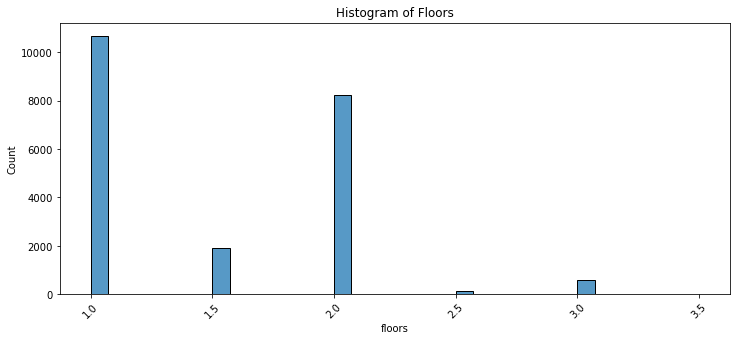

In [17]:
#What do floors look like as floats?

plt.figure(figsize=(12,5))
sns.histplot(x=data['floors'])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Histogram of Floors')

I thought perhaps it was a mistake that the floors col was a float, but after plotting I can see there are houses with half landings. Leaving as float dtype.

In [18]:
iqr(data['price'])

323050.0

In [19]:
data['price'].describe().apply(lambda x: format(x, 'f'))

count      21613.000000
mean      540088.141905
std       367127.195968
min        75000.000000
25%       321950.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

Text(0.5, 1.0, 'Boxplot of Home Prices')

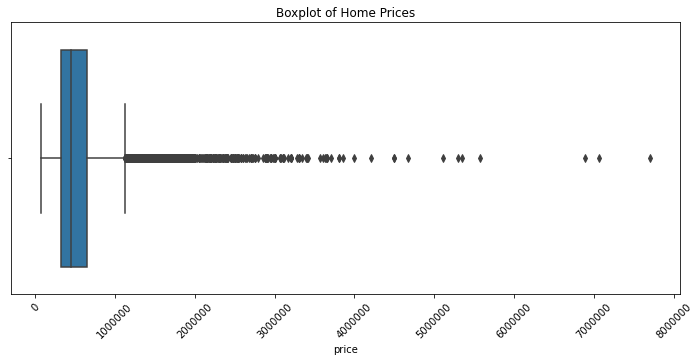

In [20]:
plt.figure(figsize=(12,5))
sns.boxplot(x =data['price'])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Home Prices')

Text(0.5, 1.0, 'Histogram of Home Prices')

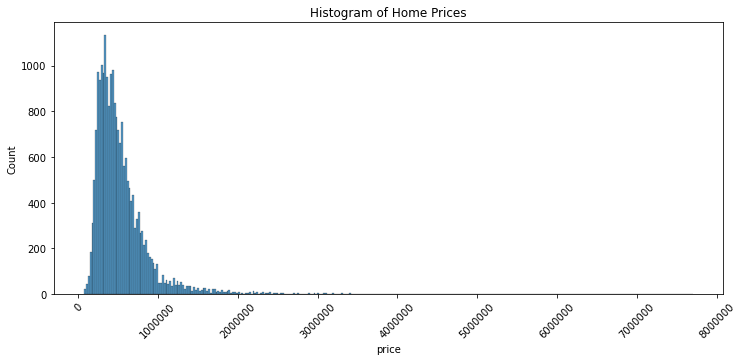

In [21]:
plt.figure(figsize=(12,5))
sns.histplot(x=data['price'])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Histogram of Home Prices')

Both the boxplot and the histogram of house sale prices show a heavily skewed distribution and so our target variable is not normally distributed.

In [22]:
data['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [23]:
iqr(data['sqft_living'])

1123.0

In [24]:
#Let's make a scatter plot showing house price x square footage

sns.set_style('whitegrid')
sns.set_context('poster')

Text(0.5, 1.0, 'Relationship b/w Price and Square Footage')

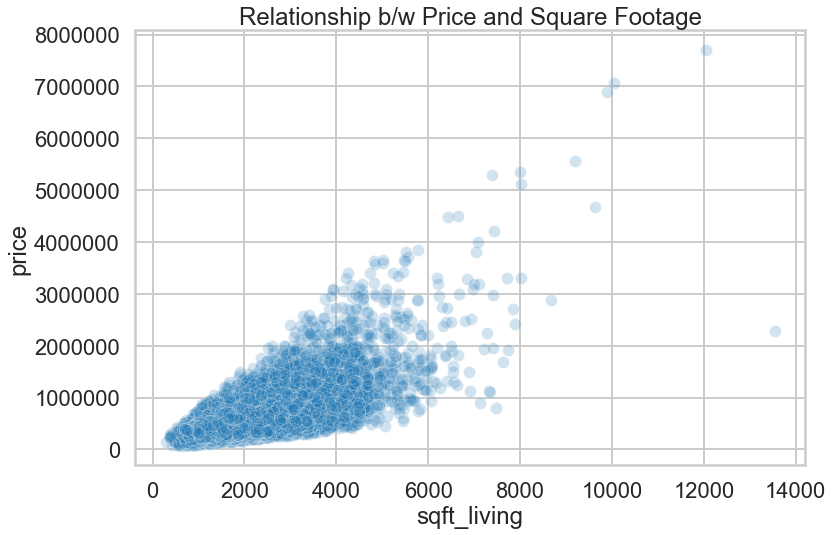

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(y=data['price'], x=data['sqft_living'], alpha=0.2)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Relationship b/w Price and Square Footage')

In [26]:
# Try a lineplot of price by when house was built

yr_data = data[['price','yr_built']]

#aggregate house by decade built
decades = yr_data.groupby((yr_data.yr_built//10)*10)['price'].median()
decades = decades.reset_index()
decades = decades.round(decimals=0)

In [27]:
decades

,yr_built,price
0,1900,550000.0
1,1910,510750.0
2,1920,535000.0
3,1930,474000.0
4,1940,389000.0
5,1950,400000.0
6,1960,379975.0
7,1970,436500.0
8,1980,450000.0
9,1990,486388.0


Text(0.5, 1.0, 'Median Home Price By Decade')

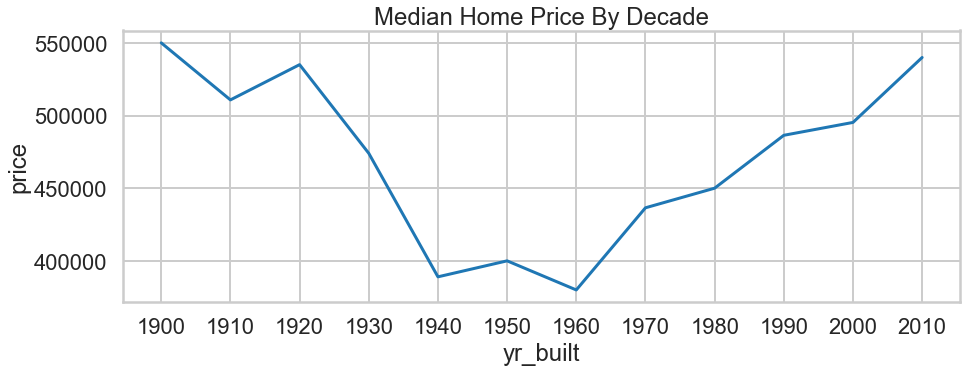

In [28]:
plt.figure(figsize=(15,5))
sns.lineplot(x ="yr_built", y ="price", data = decades)
plt.xticks([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
plt.title('Median Home Price By Decade')

Text(0.5, 1.0, 'Frequency of Houses By Year Built')

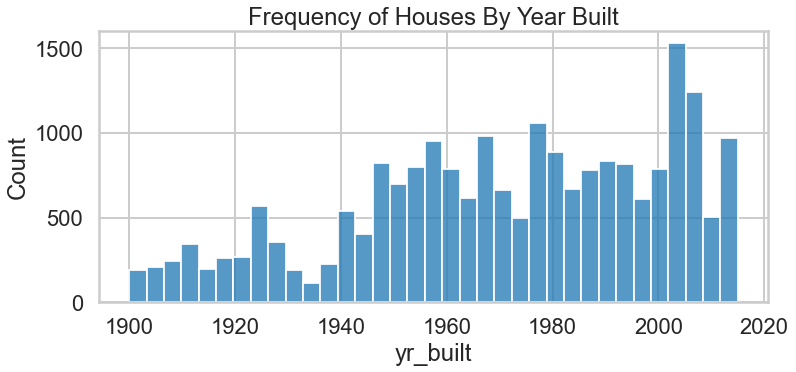

In [29]:
#How many houses were built in each year?

plt.figure(figsize=(12,5))
sns.histplot(data=data, x='yr_built')
plt.title('Frequency of Houses By Year Built')

Text(0.5, 1.0, 'Price By Condition of House')

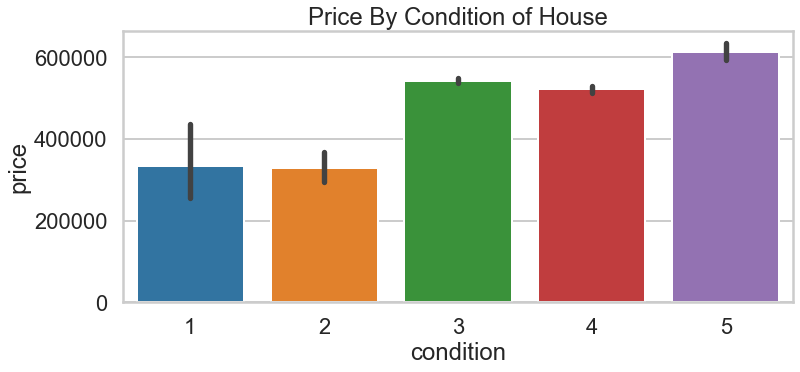

In [30]:
#What does the condition mean for pricing?

plt.figure(figsize=(12,5))
sns.barplot(x = 'condition', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Price By Condition of House')

Text(0.5, 1.0, 'Condition Frequency')

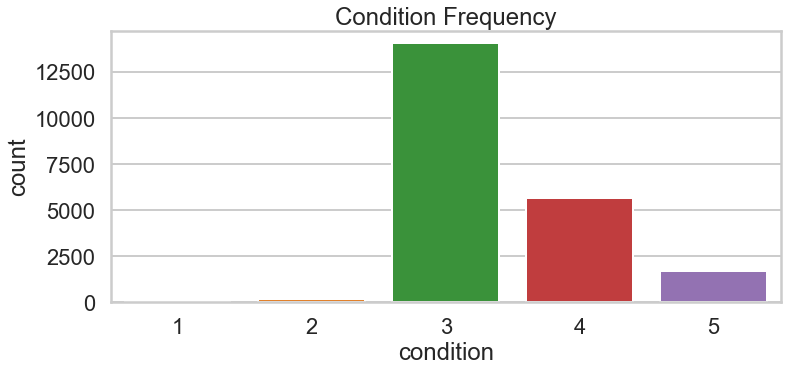

In [31]:
#What does the condition distribution look like?

plt.figure(figsize=(12,5))
sns.countplot(data=data, x='condition')
plt.title('Condition Frequency')

In [32]:
#How many properties have waterfront? 0=No, 1=Yes

data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [33]:
#Calculate percentages

df1 = (data['waterfront'].value_counts(normalize=True)
       .mul(100)
       .rename_axis('waterfront')
       .reset_index(name='percentage'))
print (df1)

   waterfront  percentage
0           0   99.245824
1           1    0.754176


Text(0.5, 1.0, 'Waterfront?')

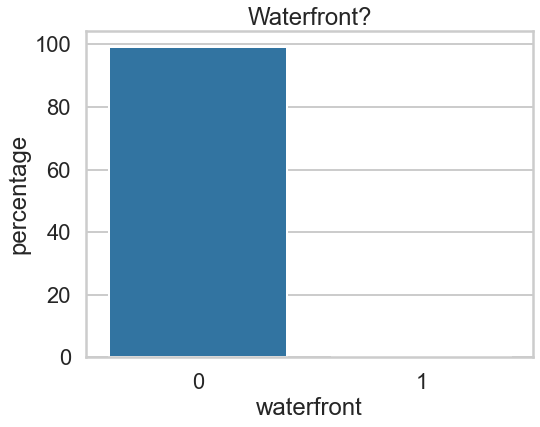

In [34]:
#Graph this

plt.figure(figsize=(8,6))
sns.barplot(x='waterfront', y='percentage', data=df1)
plt.title('Waterfront?')

In [35]:
#Make a correlation matrix to see if any features are correlated

corrMatrix = data.corr()

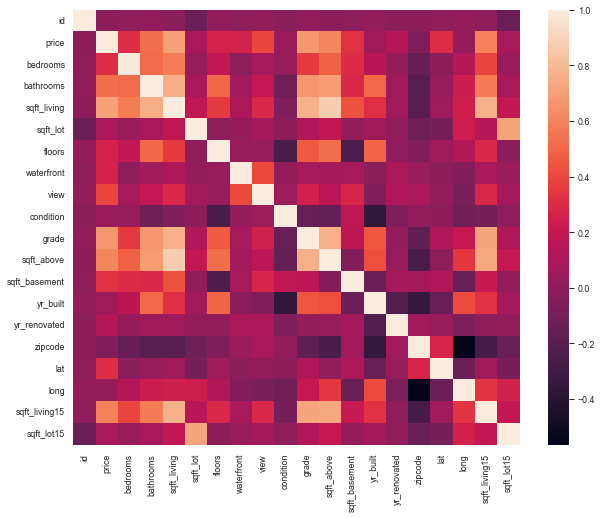

In [36]:
#Make a heatmap version
sns.set_context('paper')
plt.figure(figsize=(10,8))
sns.heatmap(corrMatrix, annot=False)
plt.show()

NOTES:

Sqft_above and sqft_living are very strongly correlated.
Looks like condition is strongly correlated with year house was built.
Disregard lat and long and id


In [37]:
#Want a heatmap that shows all the predictor variables against the target variable though...

data.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


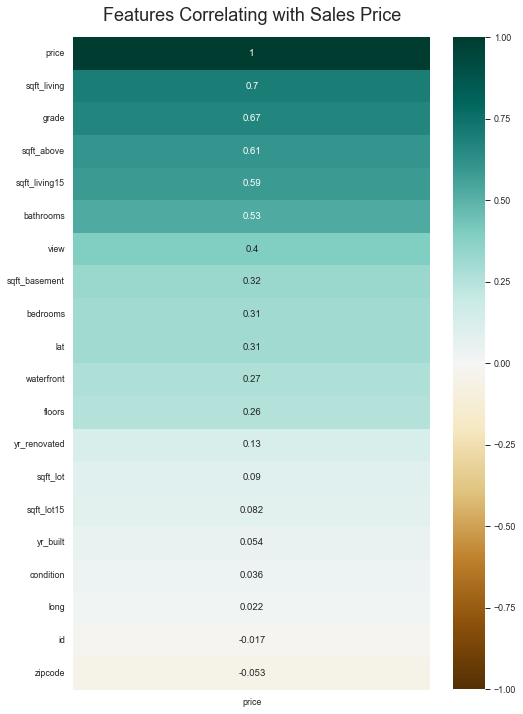

In [38]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [39]:
#Can you we list correlations in order of strength positive to negative?

sorted_matrix = corrMatrix.unstack().sort_values()

In [40]:
sorted_matrix

zipcode       long           -0.564072
long          zipcode        -0.564072
yr_built      condition      -0.361417
condition     yr_built       -0.361417
zipcode       yr_built       -0.346869
                                ...   
yr_renovated  yr_renovated    1.000000
zipcode       zipcode         1.000000
lat           lat             1.000000
condition     condition       1.000000
sqft_lot15    sqft_lot15      1.000000
Length: 400, dtype: float64

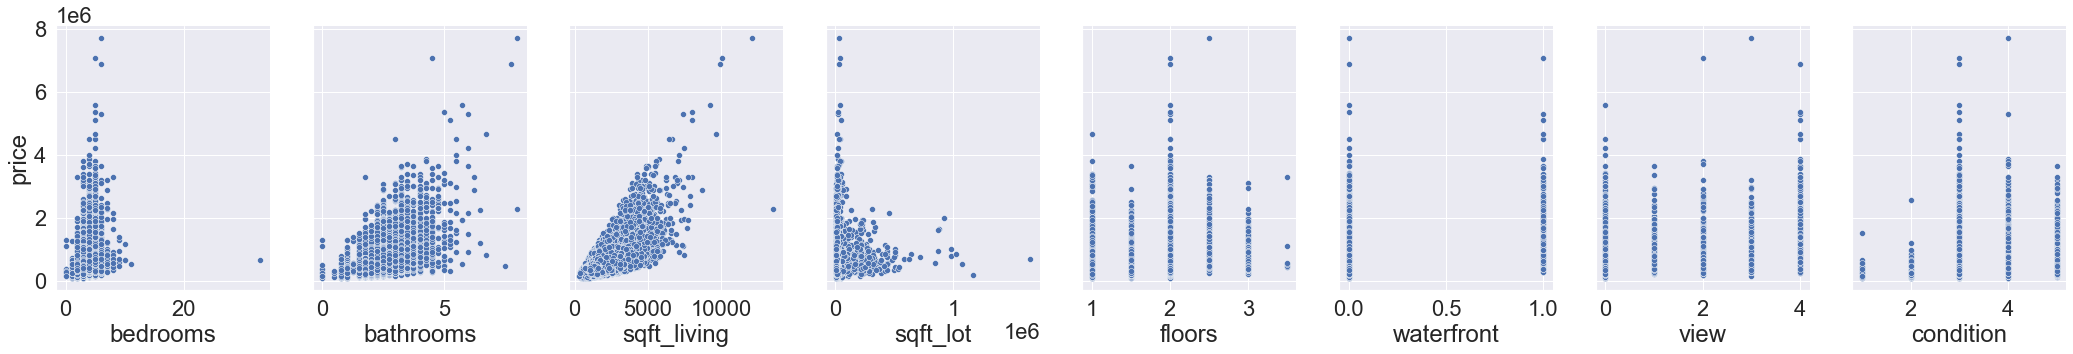

In [41]:
#Pairplot
sns.set(font_scale = 2)
pplot = sns.PairGrid(data=data, y_vars=['price'], x_vars=['bedrooms', 'bathrooms', 'sqft_living',
                                                          'sqft_lot', 'floors', 'waterfront', 'view', 'condition'], height=5, aspect=0.75)
pplot.map(sns.scatterplot)
plt.show()

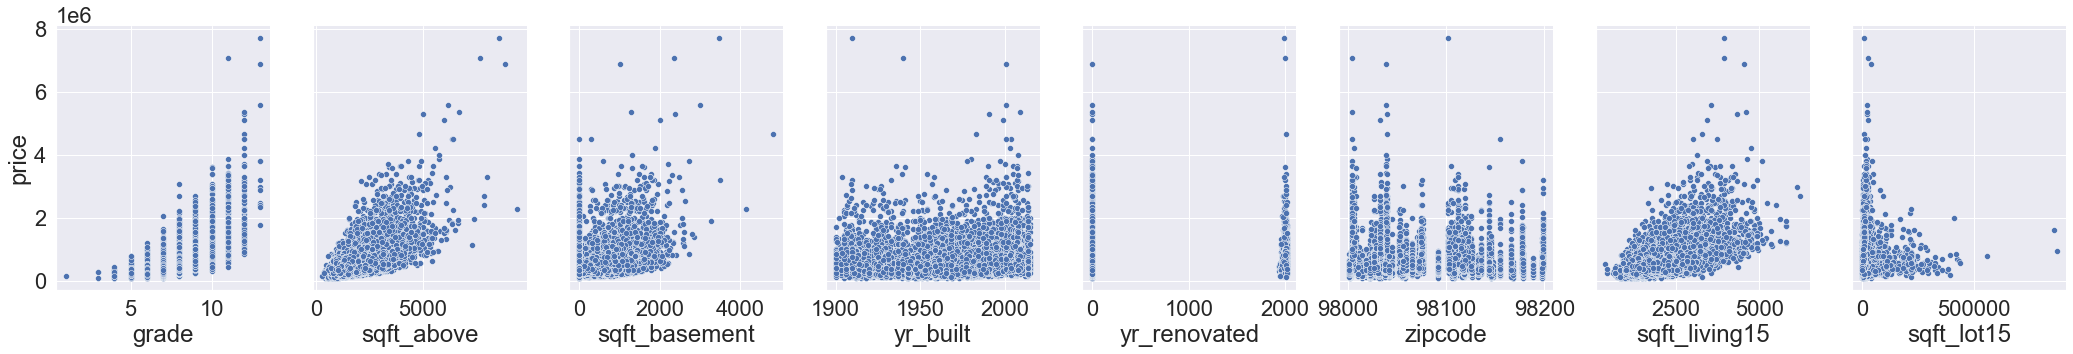

In [42]:
#Pairplot2

pplot2 = sns.PairGrid(data=data, y_vars=['price'], x_vars=['grade',
                                                          'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                                                          'sqft_living15', 'sqft_lot15'], height=5, aspect=0.75)
pplot2.map(sns.scatterplot)
plt.show()

In [43]:
#Remove some variables that will not be useful or have too much correlation with another variable
#REMOVED sqft_above,sqft_living15,sqft_lot15, lat, long, id, date

data = data[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_basement','yr_built','yr_renovated','zipcode']]

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125
2,180000,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074


In [44]:
#Turn basement col into binary vars

#make masks
data.loc[data['sqft_basement'] == 0, 'sqft_basement'] = 0
data.loc[data['sqft_basement'] > 0, 'sqft_basement'] = 1

data = data.rename(columns={'sqft_basement':'basement'})
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,basement,yr_built,yr_renovated,zipcode
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,1,1951,1991,98125
2,180000,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1,1965,0,98136
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074


In [45]:
#Make a function that creates new labels for yr_renovated col for new col

def bi_reno(row):
    if row['yr_renovated'] == 0:
        return 1
    return 0

In [46]:
#Use apply to create new col with new labels

data['no_reno'] = data.apply(lambda row: bi_reno(row), axis=1)

In [47]:
#Need to one hot encode for zip code in order to keep it in the model.

# Get one hot encoding of zipcode col
one_hot = pd.get_dummies(data['zipcode'])

# Join the encoded df
data = data.join(one_hot)

In [48]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


Let's run this data through a multiple linear regression model to see what features are important for predicting house sale prices and whether the data allows good prediction with a linear model.

In [49]:
# Split the data

from sklearn.model_selection import train_test_split

x = data.drop(['price','zipcode'], axis=1)

y = data['price']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [51]:
# Import & train the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(normalize=True).fit(x_train, y_train)

In [52]:
# The following gives the parameters of the model
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': True,
 'positive': False}

In [53]:
# Training R-square

("R-square for the training set is = ", format(lr.score(x_train, y_train), '.3f'))

('R-square for the training set is = ', '0.807')

In [54]:
# Cross Validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='r2')
print(cv_scores)

[0.785 0.806 0.799 0.807 0.817]


In [55]:
# CV Mean

np.mean(cv_scores)

0.8029585397127347

In [56]:
# Prediction

pred = lr.predict(x_test)

In [57]:
# Test R-Square

from sklearn.metrics import r2_score

("R-square for the test set is = ",format(r2_score(y_test, pred), '.3f'))

('R-square for the test set is = ', '0.811')

In [58]:
# The coefficients

from sklearn.metrics import mean_squared_error, r2_score

#Coefficients of the regression model
print("Model coefficients are = ", lr.coef_, '.3f')

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, pred))

Model coefficients are =  [ -26865.601   21977.411     201.419       0.188  -36589.596  683706.573
   53644.248   23603.867   61713.343  -58872.805    -755.176    2733.911
 5426302.372 -188272.069 -167466.313 -200580.757  582059.606  114426.848
   63103.439   47956.961   61231.662 -115859.188  -72632.358  -85038.887
 -106472.856 -202806.487 -222437.864  -35848.162  -22171.648  -69965.765
   20944.671 -180261.133 -178619.545 -179231.321  171007.216   16443.576
 -159418.235 1107387.619  321386.763 -182065.731  -99848.576   43353.439
    7757.722 -138255.322  -91085.8   -158899.768 -102994.709  -99400.536
 -224441.182  -34428.199  -15503.323  -18159.601  -66962.217 -226605.837
  325384.4    151013.341  305444.202  -35449.487  161257.978  -60784.859
  312692.909  432617.831  146878.061  106716.658  126454.127  -11625.446
  285117.399  149057.012    9880.603    7848.776  -18164.148   67823.883
   97797.895  -78803.593 -120967.507  -42645.114 -135734.329 -103188.845
   32382.71  -146442.613 

In [59]:
predictors = x_train.columns

In [60]:
# get importance
features = x_train.columns
importance = lr.coef_
indices = np.argsort(importance)

In [61]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (predictors[i],v))

Feature: bedrooms, Score: -26865.60104
Feature: bathrooms, Score: 21977.41074
Feature: sqft_living, Score: 201.41863
Feature: sqft_lot, Score: 0.18814
Feature: floors, Score: -36589.59623
Feature: waterfront, Score: 683706.57322
Feature: view, Score: 53644.24782
Feature: condition, Score: 23603.86696
Feature: grade, Score: 61713.34315
Feature: basement, Score: -58872.80531
Feature: yr_built, Score: -755.17630
Feature: yr_renovated, Score: 2733.91147
Feature: no_reno, Score: 5426302.37179
Feature: 98001, Score: -188272.06877
Feature: 98002, Score: -167466.31312
Feature: 98003, Score: -200580.75700
Feature: 98004, Score: 582059.60627
Feature: 98005, Score: 114426.84801
Feature: 98006, Score: 63103.43887
Feature: 98007, Score: 47956.96140
Feature: 98008, Score: 61231.66246
Feature: 98010, Score: -115859.18784
Feature: 98011, Score: -72632.35770
Feature: 98014, Score: -85038.88701
Feature: 98019, Score: -106472.85624
Feature: 98022, Score: -202806.48674
Feature: 98023, Score: -222437.86405

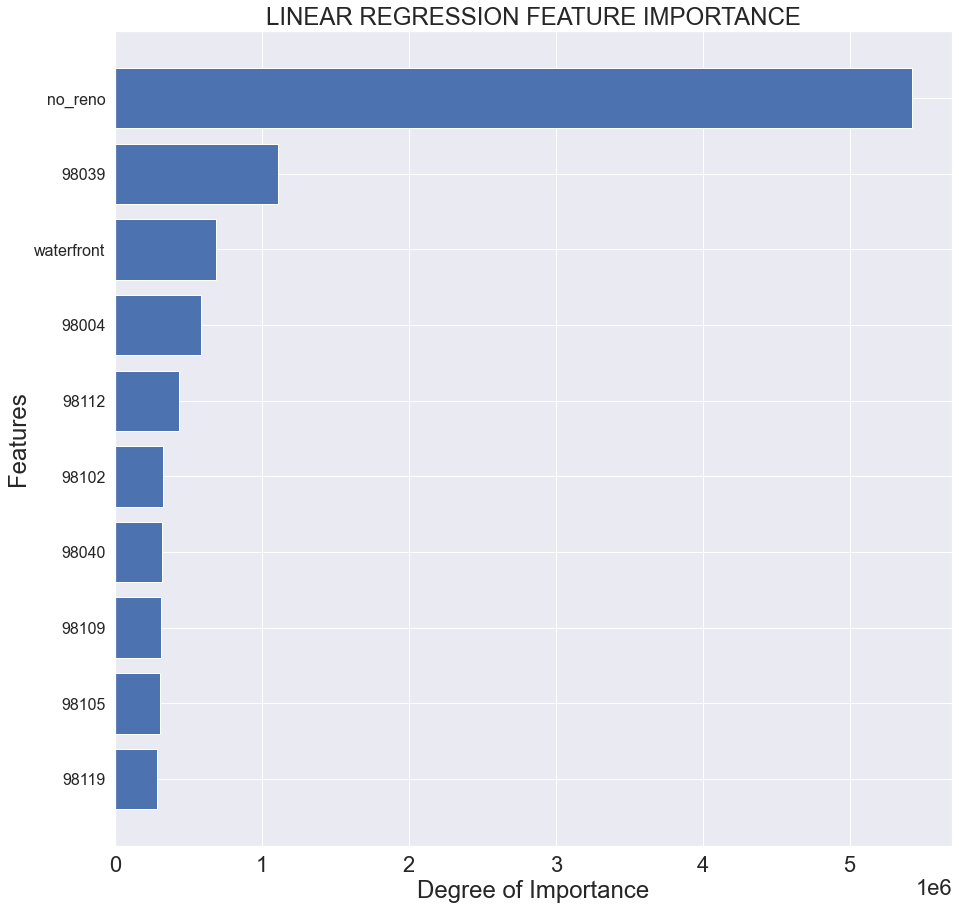

In [62]:
# plot feature importance

num_features = 10

plt.figure(figsize=(15,15))
plt.barh(range(num_features), importance[indices[-num_features:]])
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]], fontsize=16)
plt.ylabel('Features')
plt.xlabel('Degree of Importance')
plt.title('LINEAR REGRESSION FEATURE IMPORTANCE')
plt.show()

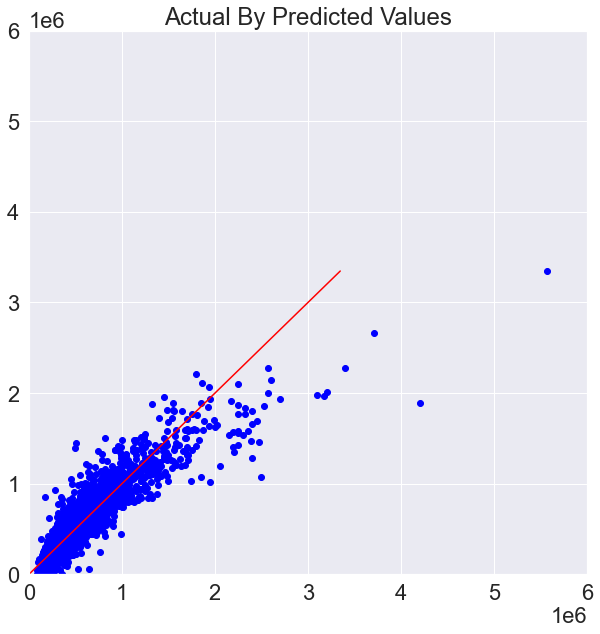

In [63]:
#Plot actual vs predicted

my_range = int(max(pred))

plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, color = "blue")
plt.plot(range(my_range), range(my_range), color='red')
plt.title('Actual By Predicted Values')
plt.xlim([0, 6e6])
plt.ylim([0, 6e6])
plt.show()

In [64]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

17290
4323
17290
4323


Try a Random Forest Regressor instead as it is non-parametric, better with outliers, and can deal with inter-dependent variables.

In [77]:
# Import & train the model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=5, min_samples_split=10)

rf.fit(x_train, y_train)

RandomForestRegressor(min_samples_leaf=5, min_samples_split=10)

In [78]:
# The following gives the parameters of the model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
# Cross Validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RandomForestRegressor(), x_train, y_train, cv=5, scoring='r2')
print(cv_scores)

[0.799 0.802 0.796 0.837 0.823]


In [80]:
# CV Mean

np.mean(cv_scores)

0.8114432662846143

In [81]:
# Prediction

pred = rf.predict(x_test)

In [82]:
# Accuracy score

print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

Accuracy on training set: 0.896
Accuracy on test set: 0.820


In [83]:
# MSE

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred))

Mean squared error: 21391098302.75


In [84]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df[:20]

    #Define size of bar plot
    plt.figure(figsize=(15,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.yticks(fontsize=10)
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

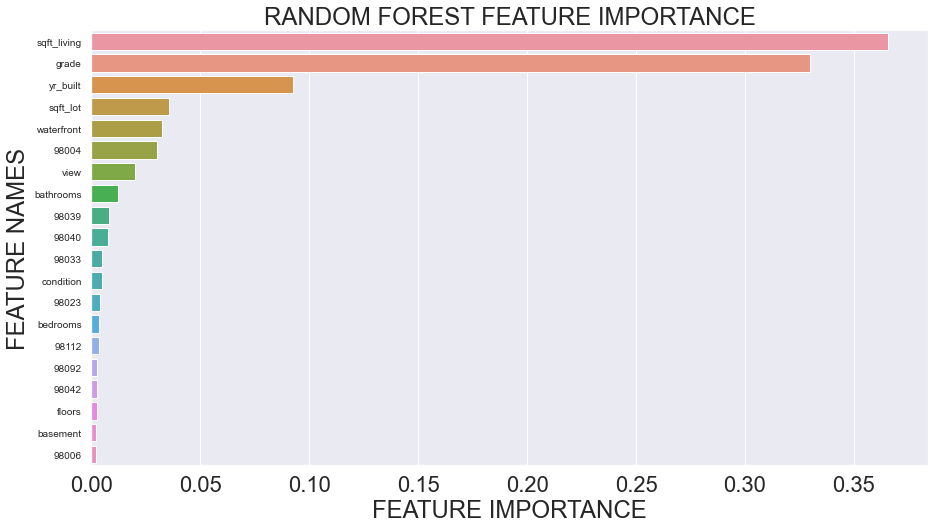

In [85]:
plot_feature_importance(rf.feature_importances_,x_train.columns,'RANDOM FOREST ')

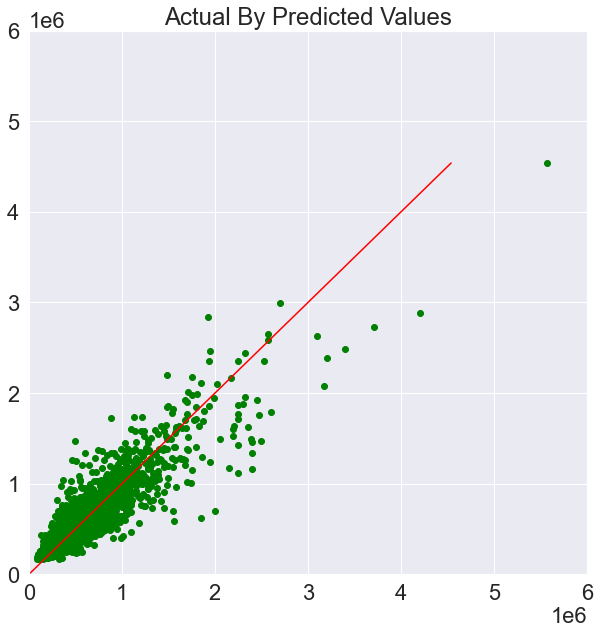

In [86]:
#Plot actual vs predicted

my_range = int(max(pred))

plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, color = "green")
plt.plot(range(my_range), range(my_range), color='red')
plt.title('Actual By Predicted Values')
plt.xlim([0, 6e6])
plt.ylim([0, 6e6])
plt.show()